In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

In [3]:
company = 'NVDA'
market = '^IXIC'
tickers = [company, market]
start_dt = '2024-11-01'
end_dt = '2025-11-01'

In [4]:
data = yf.download(tickers,start=start_dt,end=end_dt)

/tmp/ipython-input-3285580121.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers,start=start_dt,end=end_dt)
[*********************100%***********************]  2 of 2 completed


In [5]:
data.columns

MultiIndex([( 'Close',  'NVDA'),
            ( 'Close', '^IXIC'),
            (  'High',  'NVDA'),
            (  'High', '^IXIC'),
            (   'Low',  'NVDA'),
            (   'Low', '^IXIC'),
            (  'Open',  'NVDA'),
            (  'Open', '^IXIC'),
            ('Volume',  'NVDA'),
            ('Volume', '^IXIC')],
           names=['Price', 'Ticker'])

In [6]:
data['Close'].pct_change().dropna()

Ticker,NVDA,^IXIC
Date,,
2024-11-04,0.004801,-0.003286
2024-11-05,0.028372,0.014257
2024-11-06,0.040741,0.029519
2024-11-07,0.022457,0.015065
2024-11-08,-0.008396,0.000899
...,...,...
2025-10-27,0.028079,0.018642
2025-10-28,0.049820,0.008039
2025-10-29,0.029896,0.005497


In [7]:
returns = data['Close'].pct_change().dropna()

In [8]:
returns

Ticker,NVDA,^IXIC
Date,,
2024-11-04,0.004801,-0.003286
2024-11-05,0.028372,0.014257
2024-11-06,0.040741,0.029519
2024-11-07,0.022457,0.015065
2024-11-08,-0.008396,0.000899
...,...,...
2025-10-27,0.028079,0.018642
2025-10-28,0.049820,0.008039
2025-10-29,0.029896,0.005497


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

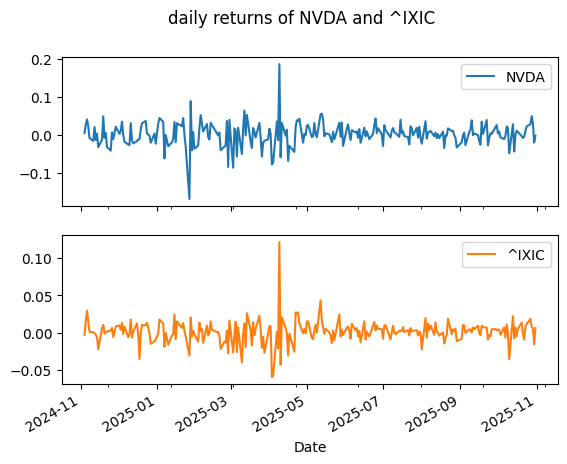

In [9]:
returns.plot(subplots= True, title = f"daily returns of {company} and {market}")

{'whiskers': [<matplotlib.lines.Line2D at 0x79710e2fdd00>,
 'caps': [<matplotlib.lines.Line2D at 0x79710e305a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x79710e304aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x79710e3060f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79710e3064b0>],
 'means': []}

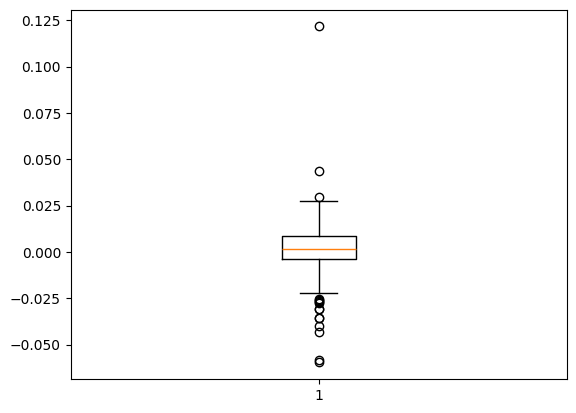

In [10]:
from re import M
import matplotlib.pyplot as plt
plt.boxplot(returns[market])

Text(0.5, 1.0, 'NVDA vs ^IXIC')

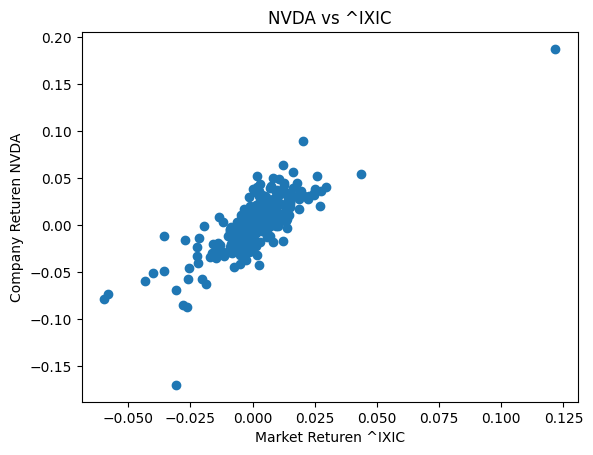

In [11]:
from re import M
import matplotlib.pyplot as plt
plt.scatter(returns[market],returns[company])
plt.xlabel(f"Market Returen {market}")
plt.ylabel(f"Company Returen {company}")
plt.title(f'{company} vs {market}')


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = returns[company].values.reshape(-1,1)
y = returns[market].values
model.fit(x,y)

LinearRegression()

In [13]:
alpha = model.intercept_
beta = model.coef_[0]
print(f"alpha is {alpha}, beta is {beta}")


alpha is 0.0003373046233312245, beta is 0.3970902951091109


Text(0.5, 1.0, 'Regression Line: NVDA vs ^IXIC')

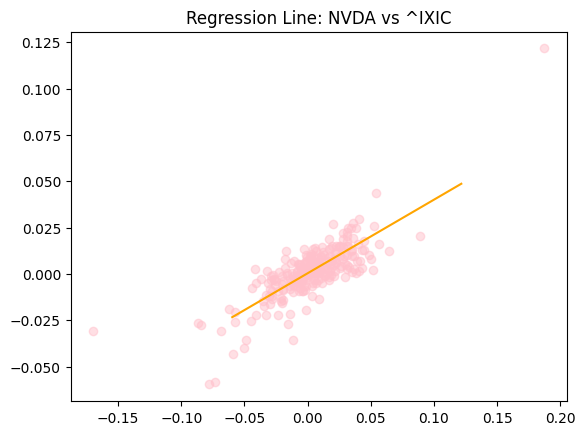

In [14]:
import numpy as np
x_vals = np.linspace(returns[market].min(),returns[market].max(),100)
y_vals = alpha + beta * x_vals
plt.scatter(x, y, alpha=0.5,color="pink")
plt.plot(x_vals, y_vals, color='orange')
plt.title(f'Regression Line: {company} vs {market}')

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(x))
print("R² =", r2)

R² = 0.6460036371941396
